# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [22]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Understanding the structure of the data

In [53]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/Drivefoodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Observations:** The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [54]:
# find the number of rows and columns with the df.shape
df.shape

(1898, 9)

#### **Observations:** The DataFrame has 1,898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [55]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:** Overall, this DataFrame has four integer datatypes, four object datatypes, and one float datatype. First, integer datatypes include these four columns: order_id, customer_id, food_preparation_time, and delivery_time. Second, object datatypes include these four columns: restaurant_name, cuisine_type, day_of_the_week, and rating. Third, cost_of_the_order is the only float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [56]:
# used df.isnull().sum() to see if there are any missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### **Observations:** This DataFrame has no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [57]:
# used df.describe() to find the statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### **Observations:** Regarding the food preparation time, the minimum, average, and maximum times are 20.000000, 27.371970, and 35.000000, respectively, likely in minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [58]:
# used df['column label'].value_counts() to assess the number of each column
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### **Observations:** 736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####Order Number

In [59]:
# check unique order ID
df['order_id'].nunique()

1898

#### **Observation:** This DataFrame has 1898 unique order IDs.

####Customer ID

In [60]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### **Observation:** This DataFrame has 1200 unique customer IDs.

####Restaurant Name

In [61]:
# check unique restaurant name
df['restaurant_name'].nunique()

178

#### **Observation:** This DataFrame has 178 unique restaurant names.

####Cuisine Type

In [62]:
# check unique cuisine types
df['cuisine_type'].nunique()

14

cuisine_type
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: count, dtype: int64

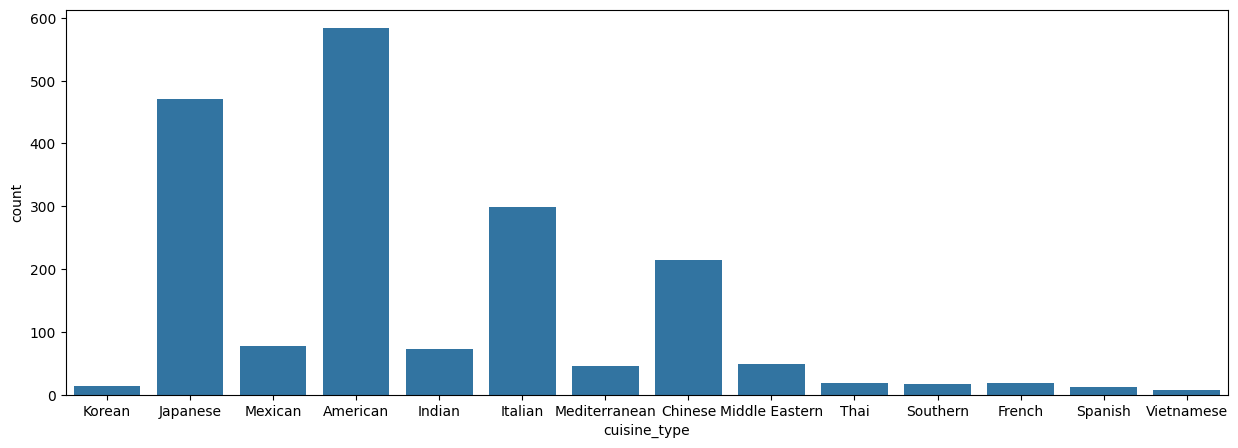

In [63]:
# visualize the 'cuisine_type' data using a countplot
plt.figure(figsize = (15, 5))
sns.countplot(data = df, x = 'cuisine_type')
# list the counts of the top five cuisine types with the highest number of orders
df['cuisine_type'].value_counts().head()

#### **Observation:** This DataFrame has 14 types of cuisine types with the most top five popular being American, Japanese, Italian, Chinese, and Mexican with 584, 470, 298, 215, and 77 meals, respectively. Its right-skewed curve shows that other types have under 100, including Indian, Mediterranean, and Middle Easter.

####Cost of the Order

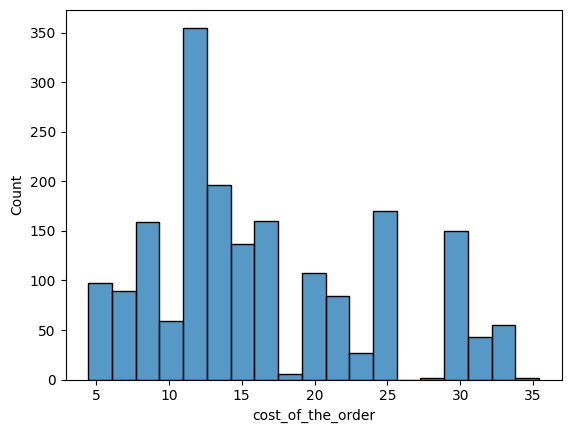

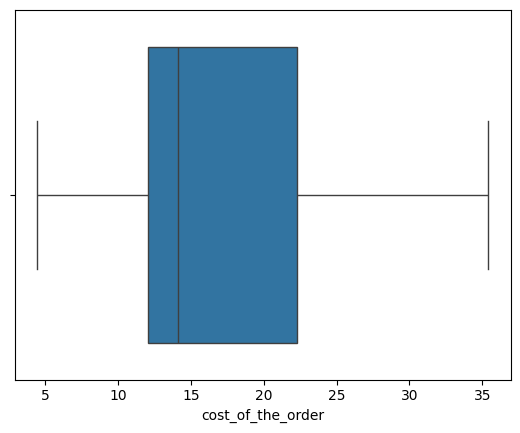

cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
Name: count, dtype: int64

In [64]:
# visualize the 'cost_of_the_order' data using the histogram
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
# visualize the 'cost_of_the_order' data using the boxplot
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()
# list the counts of the top five costs of all orders.
df['cost_of_the_order'].value_counts().head()



#### **Observation:** This DataFrame's top five costs in dollars of food are 12.18, 12.13, 12.23, 24.20, and 29.10 at 86, 82, 47, 42, and 37 orders, respectively. The currency is not stated and destroys the clean text layout. The histogram and boxplot showed a right-skewed tail with most orders were about 15 or under, signifying that the mode is likely lower than the median and mean, respectively. Similarly, the boxplot shows the minimum, 25th percentile, median, 75th percentile, and maximum values were 5, about 11, about 14, about 22, and 35, respectively.

####Day of the Week

In [65]:
# check the unique values
df['day_of_the_week'].nunique()

2

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

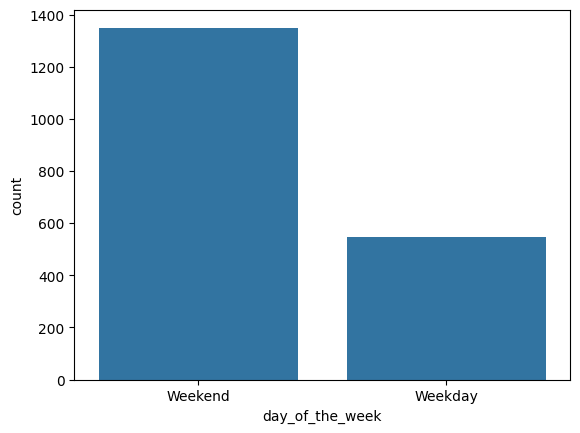

In [66]:
# visualize the data using a countplot
sns.countplot(data=df, x = 'day_of_the_week')
# count the number of orders in chronological order for the top times days of the week
df['day_of_the_week'].value_counts().head()

#### **Observation:** The DataFrame shows that more people ordered during the weekend than the week at 1,351 and 547 orders, respectively.

####Rating

In [68]:
# check the unique values
df['rating'].nunique() # complete the code to check unique values for the 'rating' column

4

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

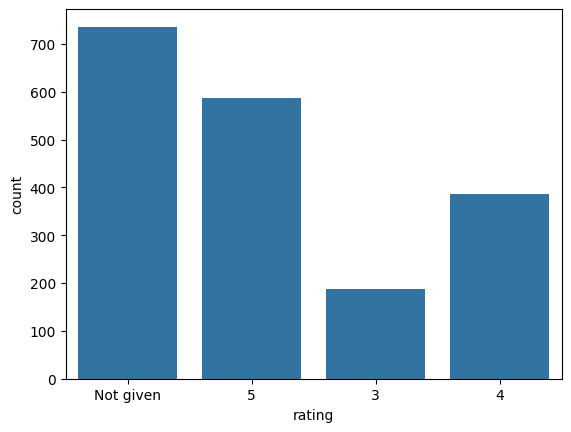

In [69]:
# visualize the data using a Countplot
sns.countplot(data = df, x ='rating')
# list the counts of the top ratings
df['rating'].value_counts().head()

#### **Observation:** The DataFrame shows that most ratings were not given, five, four, then three stars at 736, 588, 386, and 188 orders, respectively.

####Food Preparation Time

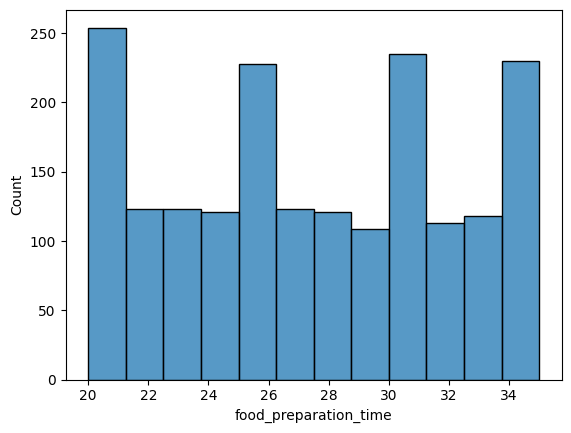

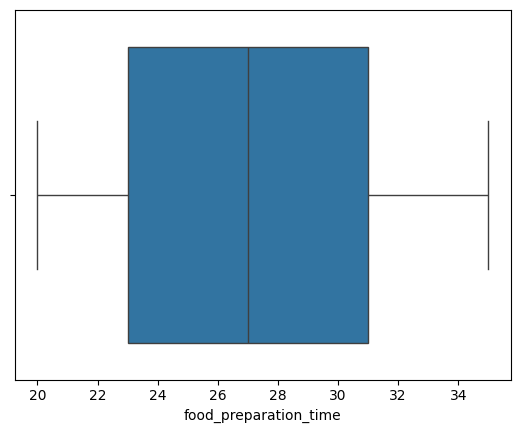

food_preparation_time
21    135
23    123
27    123
22    123
28    121
Name: count, dtype: int64

In [70]:
# visualize the data with a histogram
sns.histplot(data=df, x='food_preparation_time')
plt.show()
# visualize the data with a boxplot
sns.boxplot(data=df, x='food_preparation_time')
plt.show()
# list the counts of the top five food preparation times with the highest number of orders
df['food_preparation_time'].value_counts().head()

#### **Observation:** Based on the histogram, the DataFrame's most orders had a food preparation time of 21, 23, 27, 22 and 28 minutes with 135, 123, 123, 123, and 121 orders, respectively. Similarly, the boxplot showed a normal distribution with the minimum, 25th percentile, median, 75th percentile, and maximum values were all about 20, 23, 27, 31, and 35 minutes, respectively.

####Delivery Time

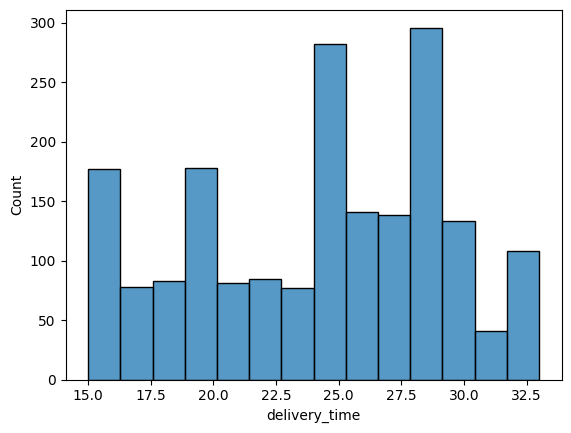

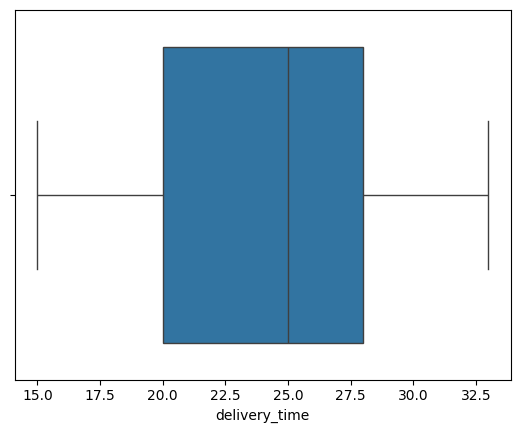

delivery_time
24    162
28    148
29    148
26    141
27    138
Name: count, dtype: int64

In [71]:
# visualize the data with a histogram
sns.histplot(data=df, x='delivery_time')
plt.show()
# visualize the data with a boxplot
sns.boxplot(data=df, x='delivery_time')
plt.show()
# list the counts of the top five delivery times with the highest number of orders
df['delivery_time'].value_counts().head()

#### **Observation:** The DataFrame's histogram for the delivery times showed a left-skewed curve, signifying a mean lower than the median and mode, respectively. Most orders were delivered at these times: 24, 28, 29, 26, and 27 minutes at 162, 148, 148, 141, and 138 orders, respectively. Similarly, the boxplot showed the minimum, 25th percentile, median, 75th percentile, and maximum values were all about 15, 20, 25, 28, and 32.5 minutes, respectively.

#### **Overall Observation:**

#### ***Overview:*** This DataFrame has 1898 unique order IDs, 1200 unique customer IDs, 178 unique restaurant names.

#### ***Cuisine Type:*** Of the 14 types of cuisine types, the most top five popular being American, Japanese, Italian, Chinese, and Mexican with 584, 470, 298, 215, and 77 meals, respectively. Its right-skewed curve shows that other types have under 100, including Indian, Mediterranean, and Middle Easter.

#### ***Costs of Food:*** This DataFrame's top five costs in dollars of food are 12.18, 12.13, 12.23, 24.20, and 29.10 at 86, 82, 47, 42, and 37 orders, respectively. The currency is not stated and destroys the clean text layout. The histogram and boxplot showed a right-skewed tail with most orders were about 15 or under, signifying that the mode is likely lower than the median and mean, respectively. Similarly, the boxplot shows the minimum, 25th percentile, median, 75th percentile, and maximum values were 5, about 11, about 14, about 22, and 35, respectively.

#### ***Day of Orders:*** The DataFrame shows that more people ordered during the weekend than the week at 1,351 and 547 orders, respectively.

#### ***Ratings:*** Of all ratings, most were “Not given,” “5,” “4,” then “3” stars at 736, 588, 386, and 188 orders, respectively.

#### ***Food Prepartion Time:*** Based on the histogram, the DataFrame's most orders had a food preparation time of 21, 23, 27, 22 and 28 minutes with 135, 123, 123, 123, and 121 orders, respectively. Similarly, the boxplot showed a normal distribution with the minimum, 25th percentile, median, 75th percentile, and maximum values were all about 20, 23, 27, 31, and 35 minutes, respectively.

#### ***Delivery Times:*** Regarding the delivery times, the histogram has a left-skewed curve, signifying a mean lower than the median and mode, respectively. Most orders were delivered at these times: 24, 28, 29, 26, and 27 minutes at 162, 148, 148, 141, and 138 orders, respectively. Similarly, the boxplot showed the minimum, 25th percentile, median, 75th percentile, and maximum values were all about 15, 20, 25, 28, and 32.5 minutes, respectively.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [72]:
# get the top five restaurants with the highest number of orders
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### **Observations:** The top five restaurants were Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm with orders of 219, 132, 119, 96, and 68, respectively.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [73]:
# get the most popular cuisines on weekends
df_weekend=df[df['day_of_the_week'] == 'Weekend']
df['cuisine_type'].value_counts().head()

cuisine_type
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: count, dtype: int64

#### **Observations:** The most popular cuisine on the weekend is American with 583 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [74]:
# get number of orders greater than 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# print the number of orders greater than 20 dollars
print("The number of total orders that cost above 20 dollars is:", df_greater_than_20)

# calculate the percentage of the orders cost more than 20 dollars
percentage = (df_greater_than_20.shape[0]/df.shape[0]) * 100

#print the percentage of the orders that cost more than 20 dollars
print("The percentage of the order that cost more than 20 dollars:", round(percentage, 2), '%')


The number of total orders that cost above 20 dollars is:       order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
3      1477334       106968              Blue Ribbon Fried Chicken   
5      1477224       147468                       Tamarind TriBeCa   
12     1476966       129969              Blue Ribbon Fried Chicken   
17     1477373       139885              Blue Ribbon Sushi Izakaya   
...        ...          ...                                    ...   
1884   1477437       304993                            Shake Shack   
1885   1477550        97324                            Shake Shack   
1892   1477473        97838                            Han Dynasty   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1895   1477819        35309                      Blue Ribbon Sushi   

     cuisine_type  cost_of_the_order day_of_the_week     rating  \
0          Korean              30.

#### **Observations:** 29.24% of the orders that costs more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [75]:
# get the mean order delivery time
mean_del_time = df['delivery_time'].mean()

#print the mean order delivery time
print("Mean order delivery time:", mean_del_time)

Mean order delivery time: 24.161749209694417


#### **Observations:** The mean order delivery time is 24.16.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [76]:
# calculate the top 3 most frequent customers
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### **Observations:** Top 3 most frequent customers' IDs are 52832, 47440, and 83287 with 13, 10, and 9 orders, respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine Type and Cost of the Order

<ipython-input-77-9e50447eb1b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


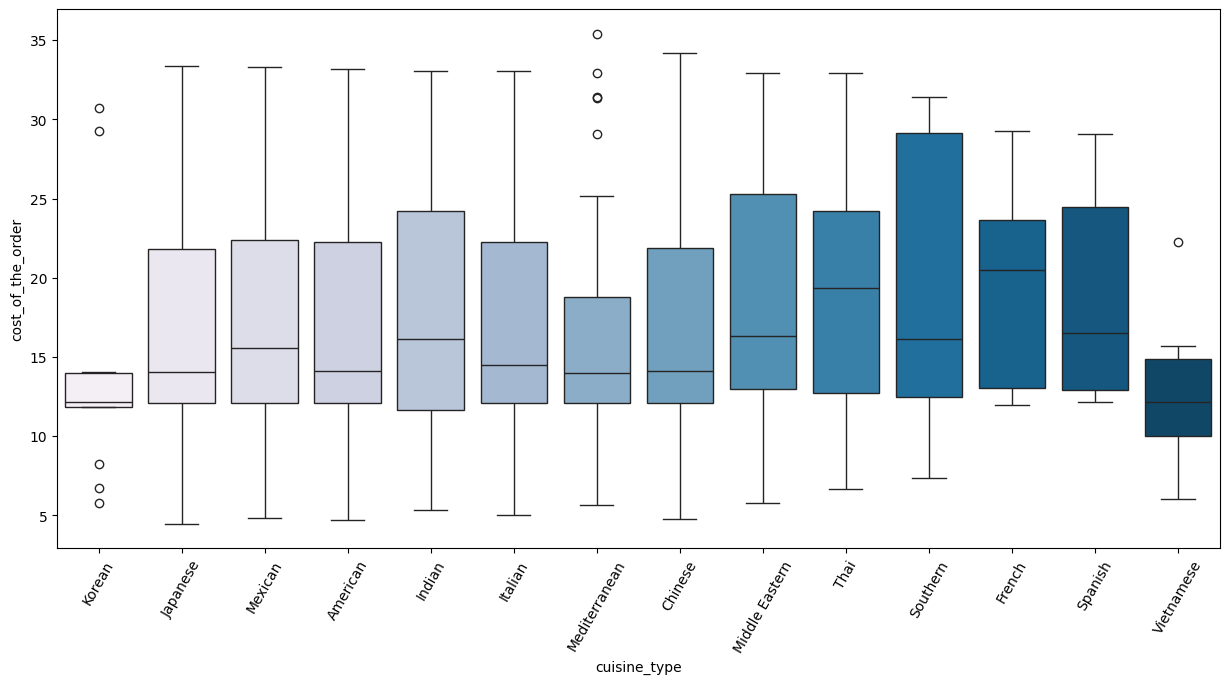

In [77]:
# relationship between cuisine type and cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine Type and Food Preparation Time

<ipython-input-78-60a4cb1178a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')


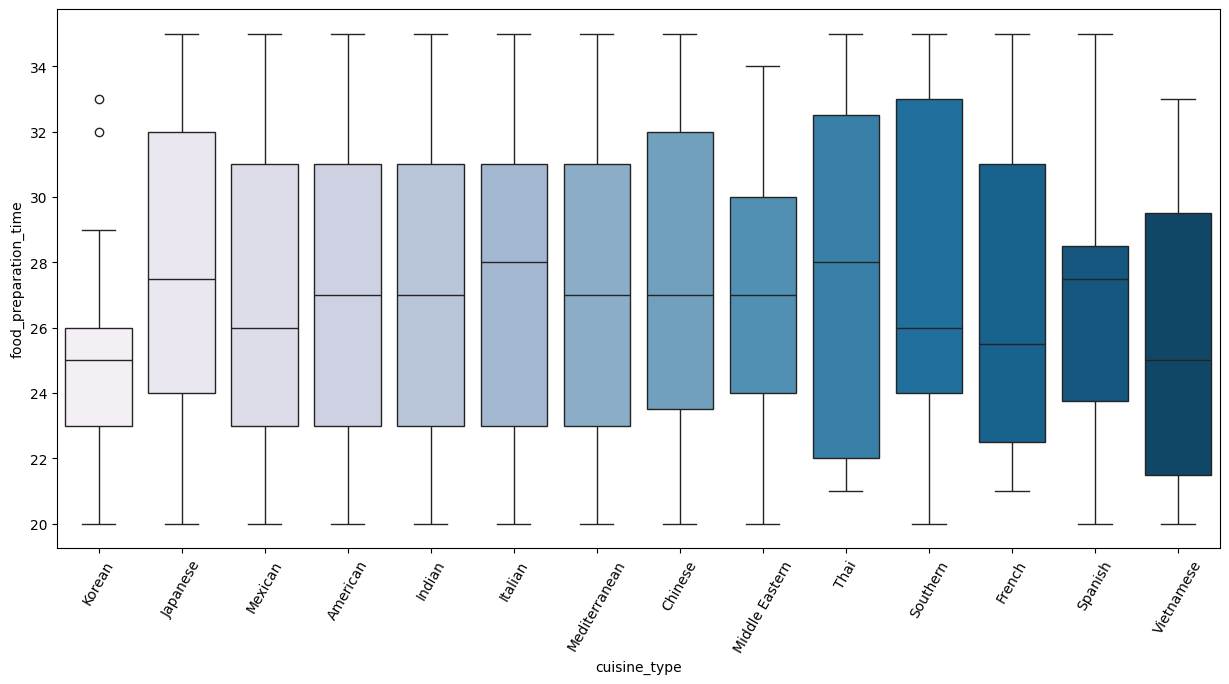

In [78]:
# relationship between cuisine type and food preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week and Delivery Time

<ipython-input-79-8e92a25513d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')


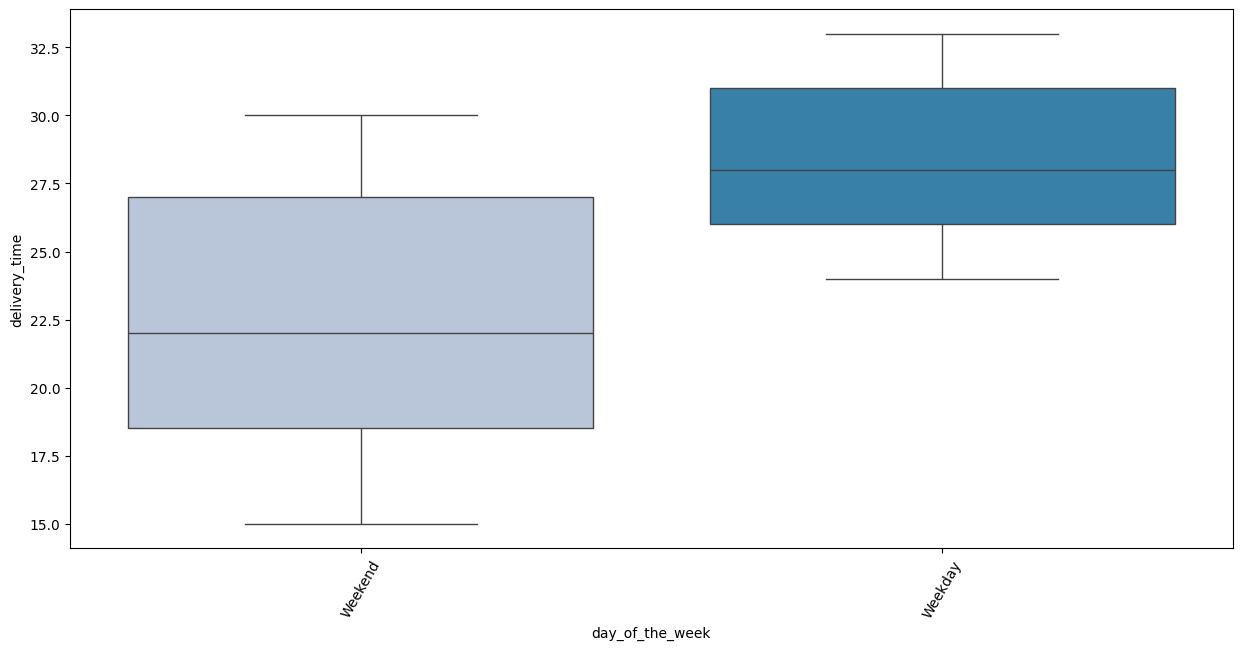

In [79]:
# relationship between cuisine type and food delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [80]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating and Delivery Time

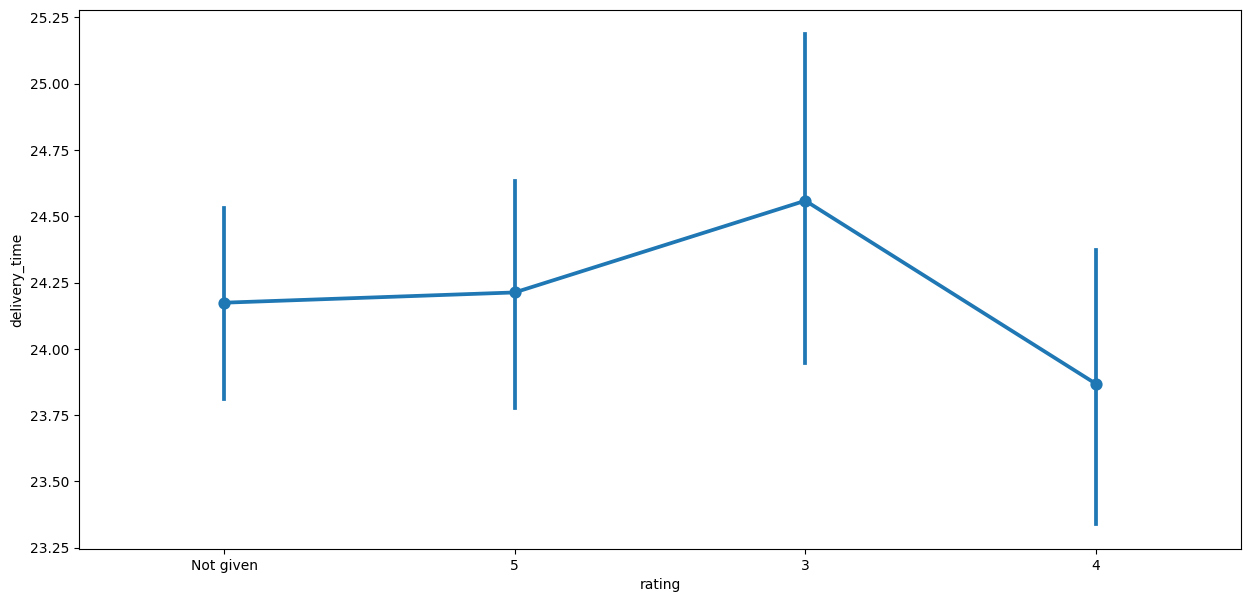

In [81]:
# relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food Preparation Time

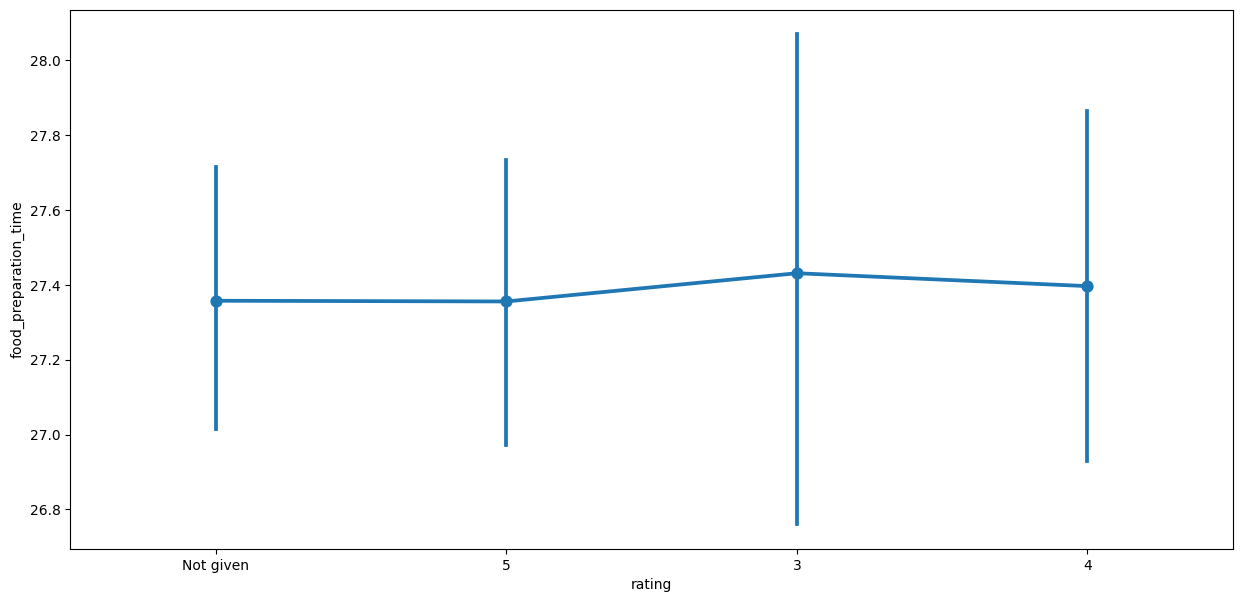

In [82]:
# relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the Order

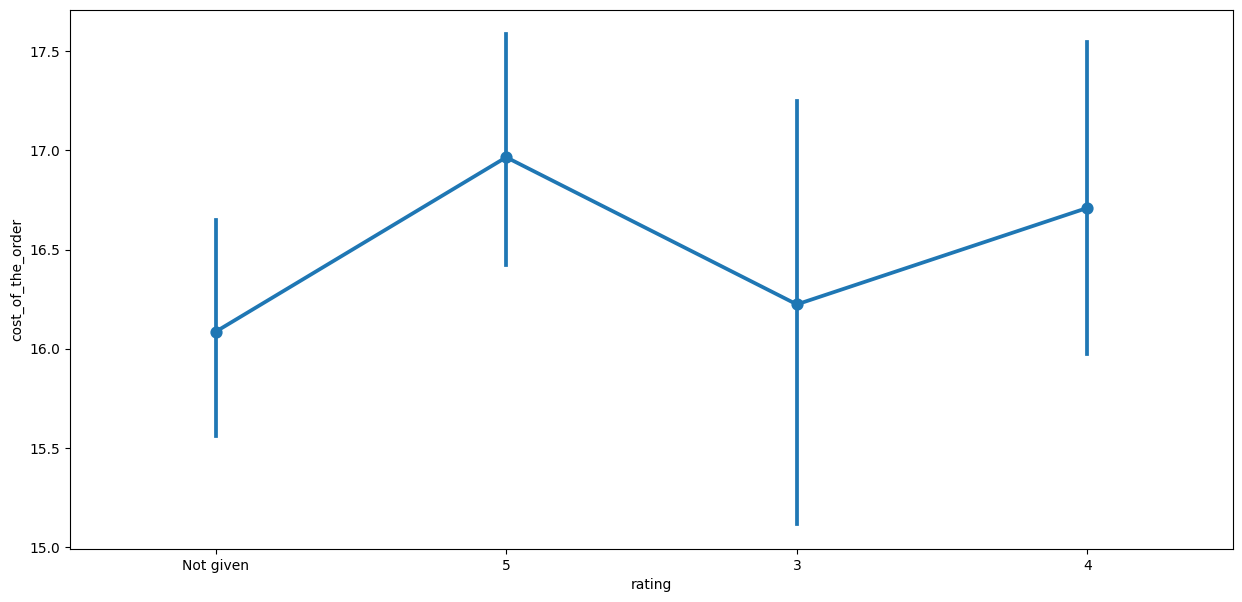

In [83]:
# relationship between rating vs cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)
plt.show()

#### Correlation among Variables

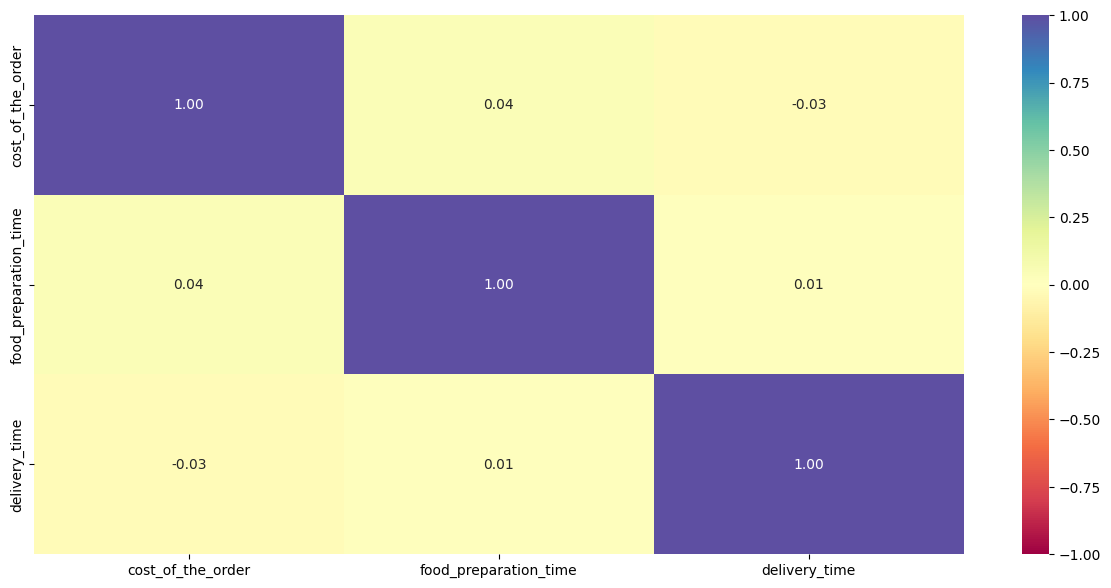

In [84]:
# plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### **Observation:** The heatmap I provided visually illustrates the correlation coefficients among three key variables: cost_of_the_order, food_preparation_time, and delivery_time. Specifically, it offers insights into how these variables interact with one another within the dataset.

#### As a standard result, each variable exhibits a perfect positive correlation with itself, indicated by a correlation coefficient of 1.00. Overall, the correlations between different variables, however, show minimal associations.

#### The correlation between cost_of_the_order and food_preparation_time is represented by a coefficient of 0.04, suggesting a very weak positive relationship. This implies that an increase in the cost of an order is associated with a slightly higher food preparation time, although the effect is minimal. The relationship between cost_of_the_order and delivery_time shows a similarly weak negative correlation with a coefficient of -0.03. As the cost increases, there is a very slight decrease in delivery time, though this effect is negligible.

#### Conversely, food_preparation_time shows an extremely weak positive correlation of 0.01 with delivery_time, indicating that there is virtually no predictable relationship between the time it takes to prepare food and the time it takes to deliver it. This suggests that factors influencing delivery times are largely independent of the preparation times.

#### Overall, these weak correlations demonstrate that there are no strong interdependencies between the cost of an order, the time taken to prepare the food, and the delivery time. This lack of strong correlations hints that other unanalyzed factors may have a more significant influence on these aspects of the food delivery process. The data analyzed here shows that understanding the dynamics of food preparation and delivery may require consideration of additional variables not included in this correlation study.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [85]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# create a dataframe with the restarurant names with ratings as counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [86]:
# get the restaurant names that have a count of more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
rest_names.head()

# filter to get the data of restaurants with rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# group the restaurant names with the ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### **Observations:** The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi are the restaurants who fulfill the criteria of having over 50 reviews and having at least four stars to get the promotional offers.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [89]:
# function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25 #25% charge for orders over $20
    elif x > 5:
        return x*0.15 #15% charge for orders over $15
    else:
        return x*0 # no charge for orders $5 or less

# apply the function to calculate the revenue for each order
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

# calculate the total net revenue generated by the company
total_net_revenue = df['Revenue'].sum()

# display the total net revenue
print(f'Total net revenue: ${total_net_revenue:.2f}')

Total net revenue: $6166.30


#### **Observations:** The net revenue generated by the company across all orders is $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [90]:
# calculate the total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# calculate the number of orders taking over 60 minutes from time it is ordered to being delivered
df_greater_than_60 = df[df['total_time']>60]

# print the number of orders taking over 60 minutes from time it is ordered to being delivered
print("The number of orders taking more than 60 minutes to get delivered from time the order was placed is:", df_greater_than_60)

# calculate the percentage of orders that take more than 60 minutes to get delivered from the time the order is placed
percentage = (df_greater_than_60.shape[0]/df.shape[0]) * 100

# print the percentage of the orders that take more than 60 minutes to get delivered from the time the order is placed
print("The percentage of the orders that take more than 60 minutes to get delivered from the time the order is placed:", round(percentage, 2), '%')

The number of orders taking more than 60 minutes to get delivered from time the order was placed is:       order_id  customer_id             restaurant_name    cuisine_type  \
7      1477859        89574                   Barbounia   Mediterranean   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼         Chinese   
19     1477354        67487           Blue Ribbon Sushi        Japanese   
24     1476714       363783                Cafe Mogador  Middle Eastern   
54     1477760       130507           Jack's Wife Freda   Mediterranean   
...        ...          ...                         ...             ...   
1869   1476923        50199                 J. G. Melon        American   
1873   1478148       261371                 Shake Shack        American   
1875   1478039       292343                  Amy Ruth's        Southern   
1880   1477466       222734                 Shake Shack        American   
1889   1478190        94152            RedFarm Broadway         Chinese   

#### **Observations:** The percentage of the orders that take more than 60 minutes to get delivered from the time the order is placed is 10.54%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [91]:
# get the mean delivery time on the weekdays and print it
print('The mean delivery time on weekdays is around',
        round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
        'minutes')

# get the mean delivery time on the weekdends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
      'minutes')



The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### **Observations:** The mean delivery time during the weekdays is longer than during the weekends at 28 versus 22 minutes, respectively.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Firstly, there is a pronounced preference for specific cuisines among our customers, with American, Japanese, Italian, Chinese, and Mexican cuisines topping the popularity charts. This not only indicates a robust market demand for these cuisines but also points to potential areas for menu expansion or enhanced marketing efforts.

*  Secondly, a significant portion of orders, notably 736 out of 1898, do not have customer ratings. This gap suggests potential shortcomings in customer engagement and feedback collection, which are crucial for service enhancement and customer satisfaction.

*  Additionally, our data reveals that more orders are placed during weekends compared to weekdays. This trend has implications for staffing and logistics, necessitating strategic adjustments to meet increased demand efficiently. In terms of delivery efficiency, there is a noticeable variance in delivery times between weekdays and weekends, which could influence overall customer satisfaction.

*  Lastly, a substantial segment of our customer base, approximately 29.24%, opts for orders costing more than $20. This insight into consumer spending behavior highlights an opportunity to cater to a market segment that may prefer premium dining options.

### Recommendations:

*  Expanding the variety of offerings in the most popular cuisine categories could potentially increase customer satisfaction and attract new customers. In conjunction with this, partnering with more restaurants that specialize in these popular cuisines could further enrich our service offering.

*  Improving customer engagement is paramount. We advise implementing a more robust system for collecting and encouraging feedback, possibly through incentives for customers to leave reviews or ratings post-purchase. This would not only improve our service quality through direct customer insights but also enhance customer interaction with our platform.

*  Given the increased order volume over weekends, optimizing operational and delivery strategies for these peak times is essential. This could include optimizing delivery routes or increasing staffing during these periods to handle the surge in orders more efficiently. Moreover, targeting the demographic that frequently opts for higher-value orders with promotions tailored to high-end cuisine options or premium meal deals could encourage higher spending and enhance customer loyalty.

*  Lastly, addressing the causes of slower delivery times on weekdays will be crucial in maintaining consistent service quality across the board. Potential solutions could include additional training for delivery personnel and technological advancements in route planning.

---